# The following project aims to investigate the probability of correctly predicting the type of breast cancer (malignant or benign) given the characteristics of breast mass calculated from digitized images. The characteristics describe the nucleus of the cell present in the breast mass.

## Feature information:

###     Feature                     Domain
   -- -----------------------------------------
###   1. Sample code number            id number
###   2. Clump Thickness               1 - 10
###   3. Uniformity of Cell Size       1 - 10
###   4. Uniformity of Cell Shape      1 - 10
###   5. Marginal Adhesion             1 - 10
###   6. Single Epithelial Cell Size   1 - 10
###   7. Bare Nuclei                   1 - 10
###   8. Bland Chromatin               1 - 10
###   9. Normal Nucleoli               1 - 10
### 10. Mitoses                       1 - 10
###  11. Class:                        (2 for benign, 4 for malignant)

In [1]:
import os
import sys
import time
import datetime
import numpy as np
import pandas as pd
import pathlib
import csv
import matplotlib.pyplot as plt

In [2]:
datapath = pathlib.Path("../Data Science/")
outputs = pathlib.Path("../outputs/")
csvfile = "breastcancerdata.csv"
datafile = datapath / csvfile

## Looking to data the way they were captured.

In [3]:
df = pd.read_csv(datafile)
df.head()
#df.info()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
df.shape

(698, 11)

## Inserting feature name in columns.

In [5]:
df.columns = ['Id', 'Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

## Removing Id columns because it doesn't add much information.

In [6]:
df2 = df[['Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']]

In [7]:
df2.head()

,Thickness,UniofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [8]:
df2.dtypes

Thickness                    int64
UniofCellSize                int64
UniformityofCellShape        int64
MarginalAdhesion             int64
SingleEpithelialCellSize     int64
BareNuclei                  object
Bland Chromatin              int64
Normal Nucleoli              int64
Mitoses                      int64
Class                        int64
dtype: object

## The BareNuclei feature is said to be object, which doesn't makes any sense because it is a value between 1 - 10 so let's look into it.

In [9]:
df2.BareNuclei.unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

## We have a '?' that according to data description by UCI means 'NaN'.

In [10]:
df2['BareNuclei'] = df2['BareNuclei'].str.replace('?','0').astype(int)
df2.BareNuclei.unique()

/home/kaline/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([10,  2,  4,  1,  3,  9,  7,  0,  5,  8,  6])

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
Thickness                   698 non-null int64
UniofCellSize               698 non-null int64
UniformityofCellShape       698 non-null int64
MarginalAdhesion            698 non-null int64
SingleEpithelialCellSize    698 non-null int64
BareNuclei                  698 non-null int64
Bland Chromatin             698 non-null int64
Normal Nucleoli             698 non-null int64
Mitoses                     698 non-null int64
Class                       698 non-null int64
dtypes: int64(10)
memory usage: 54.6 KB


In [12]:
len(df2[df2.BareNuclei==0])

16

## We are dealing with a sensitive data set where any inference on feature value can jeopardize the classification that is why we are deleting the rows that don't have information on BareNuclei, the good news is there are few rows to delete.

In [13]:
df2 = df2[df2.BareNuclei != 0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 10 columns):
Thickness                   682 non-null int64
UniofCellSize               682 non-null int64
UniformityofCellShape       682 non-null int64
MarginalAdhesion            682 non-null int64
SingleEpithelialCellSize    682 non-null int64
BareNuclei                  682 non-null int64
Bland Chromatin             682 non-null int64
Normal Nucleoli             682 non-null int64
Mitoses                     682 non-null int64
Class                       682 non-null int64
dtypes: int64(10)
memory usage: 58.6 KB


In [14]:
#Número de casos malignos
maligno = len(df2[df2['Class']==4])

#Número de casos benignos
benigno = len(df2[df2['Class']==2])

#Taxa de tumores malignos
taxa = str((float(maligno)/(len(df2)))*100)

print(u'Numero de casos de tumores malignos: ' , maligno)
print(u'Número de casos de tumores benignos: ' , benigno)
print(u'Taxa de tumores malignos: ' + taxa + '%')

Numero de casos de tumores malignos:  239
Número de casos de tumores benignos:  443
Taxa de tumores malignos: 35.043988269794724%


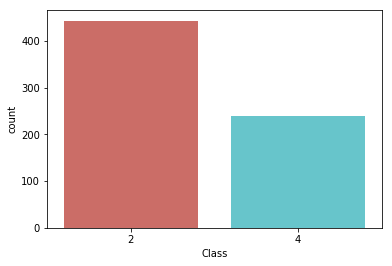

In [15]:
import seaborn as sns
sns.countplot(x='Class',data=df2, palette='hls')
plt.show()

## Lets' look to features relation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f685a0749e8>,
      dtype=object)

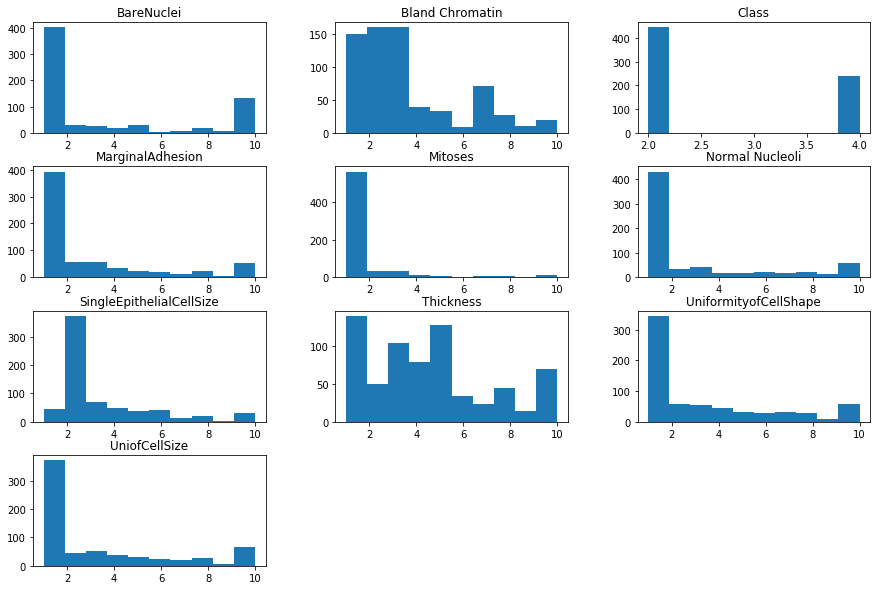

In [16]:
df2.hist(bins=10, figsize=(15, 10), grid=False)

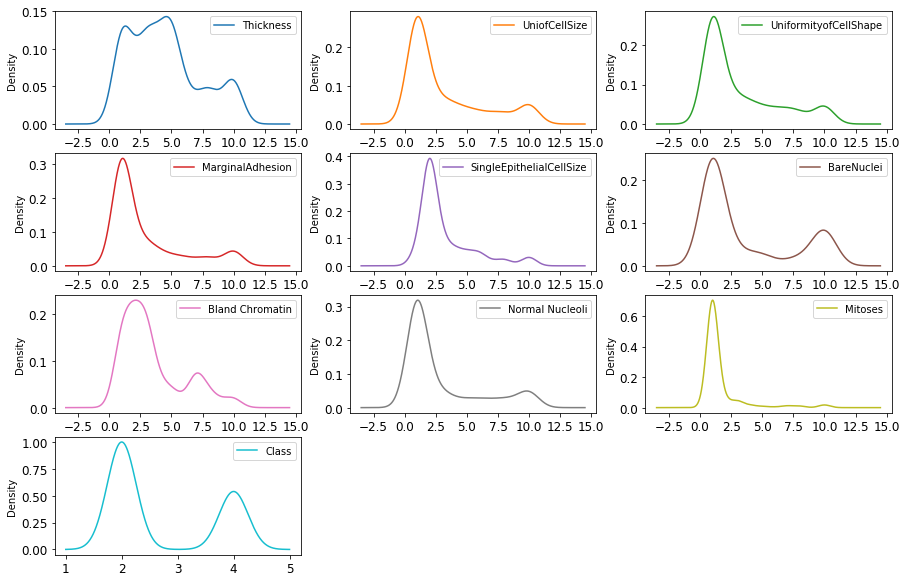

In [17]:
#Density plot.
plt = df2.plot(kind='density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

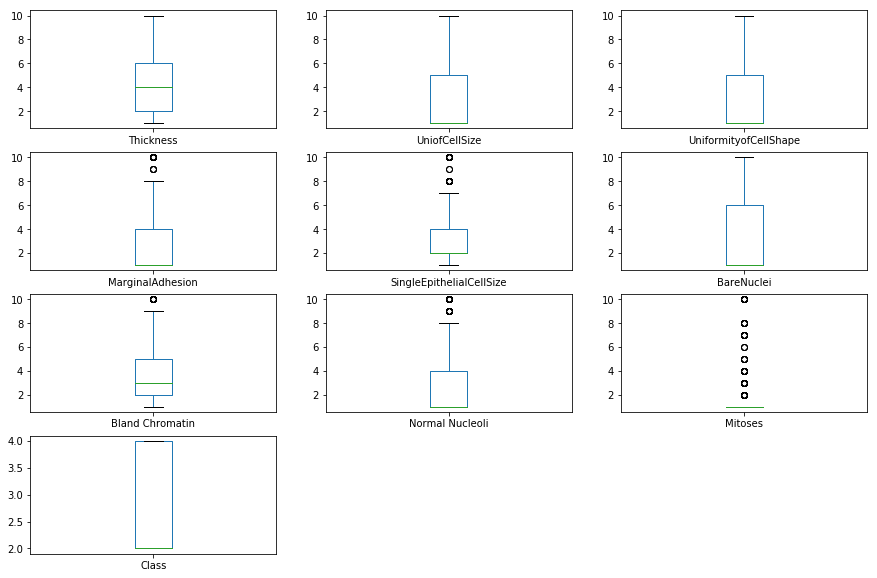

In [18]:
plt=df2.plot(kind= 'box' , subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(15,10))

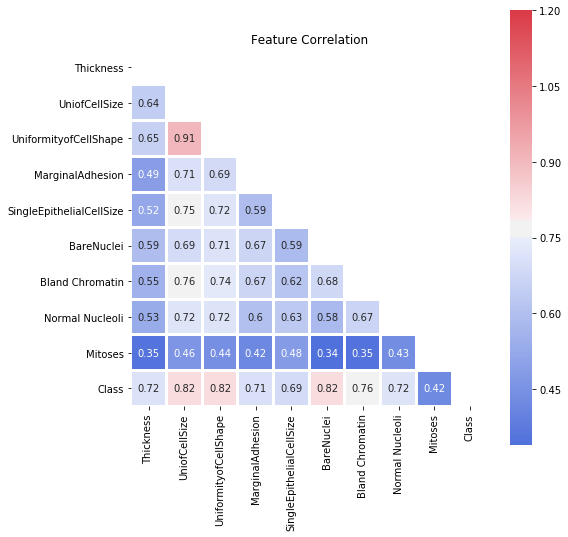

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

corr = df2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

df2, ax = plt.subplots(figsize=(8, 8))
plt.title('Feature Correlation')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

# Let's look to the features that have more correlation according to the graph above.

In [23]:
df = pd.read_csv(datafile)
df.columns = ['Id', 'Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
df2 = df[['Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']]
df2['BareNuclei'] = df2['BareNuclei'].str.replace('?','0').astype(int)
df2 = df2[df2.BareNuclei != 0]

/home/kaline/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


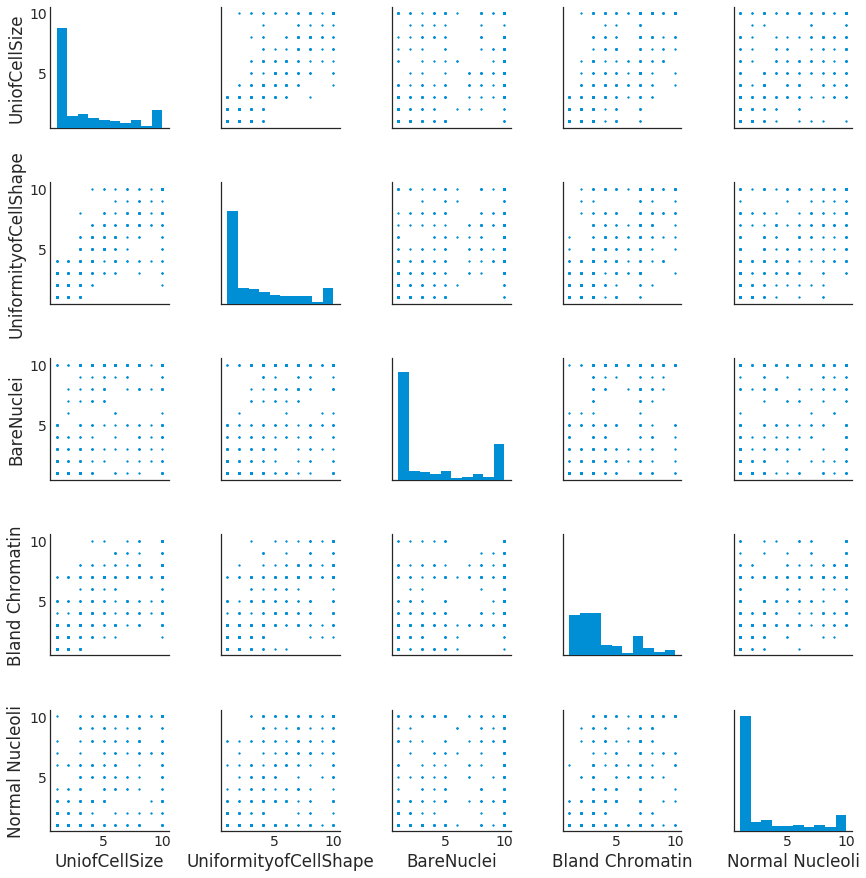

In [24]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

g = sns.PairGrid(df2[['UniofCellSize', 'UniformityofCellShape','BareNuclei','Bland Chromatin', 'Normal Nucleoli']])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

# Using some models on the data set.
## We are using logistic regression because is more appropriate in classification case.

In [25]:
y = df2.Class
X = df2[['Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize',
         'BareNuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(477, 10) (477,)
(205, 10) (205,)


In [28]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()

In [29]:
model = logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

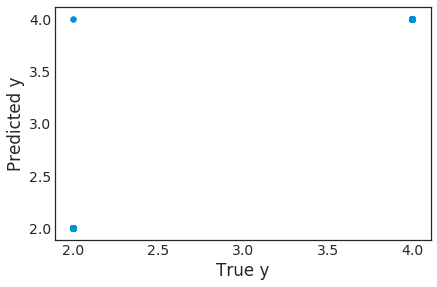

In [30]:
plt.scatter(y_test, predictions)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.show()

In [31]:
print ('Score:', model.score(X_test, y_test)*100, '%')

Score: 99.51219512195122 %


# Decision tree.

In [32]:
import codecs
import scipy.stats as ss
import scipy.signal as signal
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image #needed to render in notebook
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import pylab as pl

In [33]:
features = set(df2[['Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 
                    'SingleEpithelialCellSize','BareNuclei', 'Bland Chromatin', 'Normal Nucleoli',
                    'Mitoses', 'Class']])

In [34]:
for feature in features:
    print(u'Feature {} has unique values: {}'.format(feature, df2[feature].unique()))
    print(u'Quantidade de features:', len(features))

Feature Thickness has unique values: [ 5  3  6  4  8  1  2  7 10  9]
Quantidade de features: 10
Feature Class has unique values: [2 4]
Quantidade de features: 10
Feature SingleEpithelialCellSize has unique values: [ 7  2  3  1  6  4  5  8 10  9]
Quantidade de features: 10
Feature Bland Chromatin has unique values: [ 3  9  1  2  4  5  7  8  6 10]
Quantidade de features: 10
Feature UniformityofCellShape has unique values: [ 4  1  8 10  2  3  5  6  7  9]
Quantidade de features: 10
Feature MarginalAdhesion has unique values: [ 5  1  3  8 10  4  6  2  9  7]
Quantidade de features: 10
Feature Normal Nucleoli has unique values: [ 2  1  7  4  5  3 10  6  9  8]
Quantidade de features: 10
Feature Mitoses has unique values: [ 1  5  4  2  3  7 10  8  6]
Quantidade de features: 10
Feature UniofCellSize has unique values: [ 4  1  8 10  2  3  7  5  6  9]
Quantidade de features: 10
Feature BareNuclei has unique values: [10  2  4  1  3  9  7  5  8  6]
Quantidade de features: 10


In [35]:
#clf = tree.DecisionTreeClassifier(criterion='entropy', max_features="auto", min_samples_leaf=10)
clf = tree.DecisionTreeClassifier(criterion='gini', max_features=None, min_samples_leaf=10)
features_list=['Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 
                'SingleEpithelialCellSize','BareNuclei', 'Bland Chromatin', 'Normal Nucleoli','Mitoses']
clf.fit(df2[features_list],df2.Class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
print(clf.n_features_)
print(clf.feature_importances_)

9
[9.45515840e-03 8.37218810e-01 7.91549444e-02 2.34215490e-03
 0.00000000e+00 7.11025010e-02 4.98863404e-04 2.27568206e-04
 0.00000000e+00]


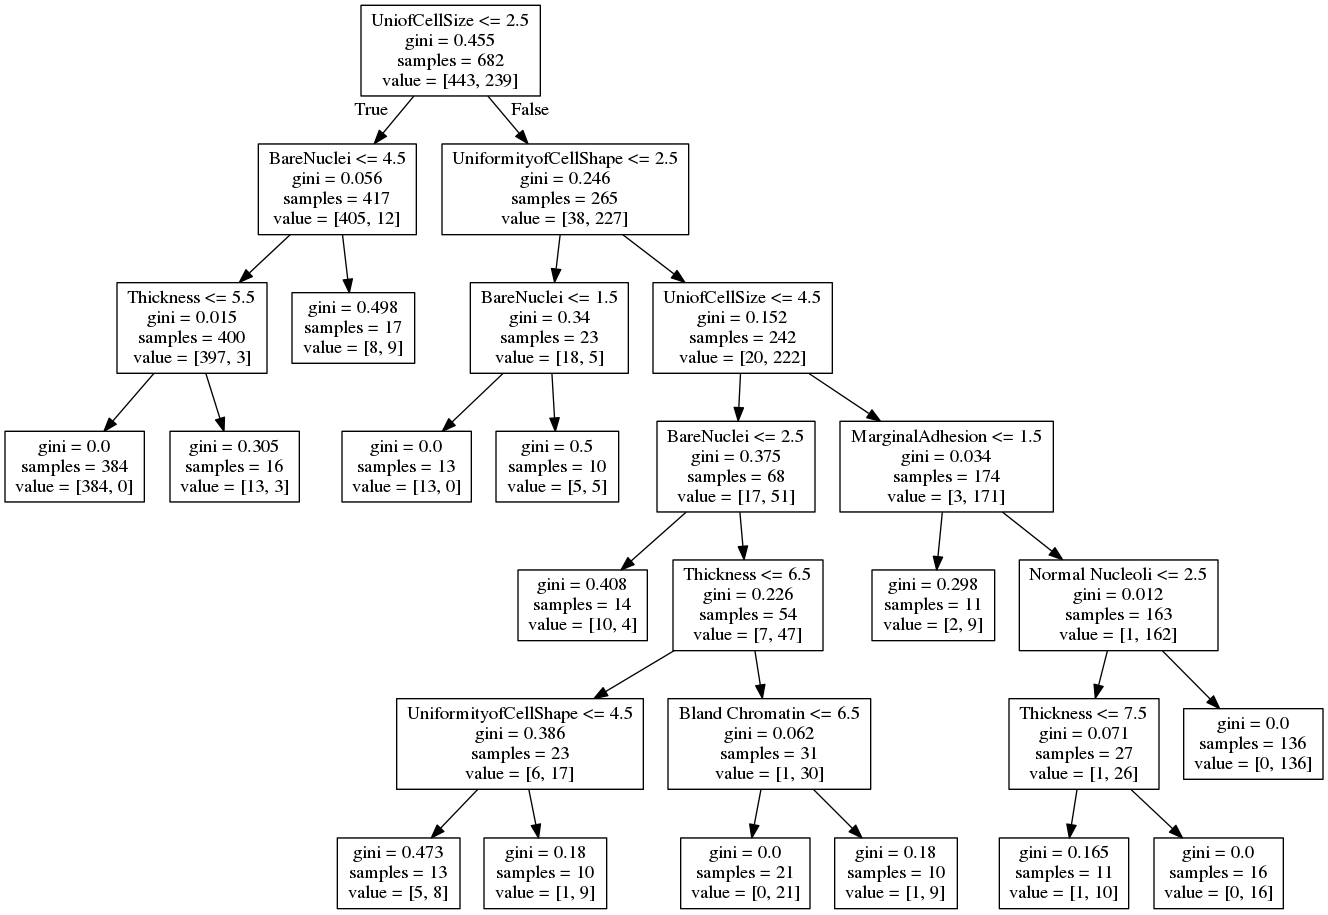

In [37]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features_list) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())